# Yusuf Abdul

In [1]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn

In [2]:
%matplotlib inline  
import matplotlib.pyplot as plt  

---

## Introduction to my project

For this project, I will be using the [Boston Housing Prices Data Set](http://www.kellogg.northwestern.edu/faculty/weber/emp/_session_3/boston.htm).  Please read about the dataset carefully before continuing. You can use the following commands to load the dataset:

In [3]:
# load Boston housing data set
data = np.loadtxt('data.txt')
target = np.loadtxt('target.txt')

---

## Part 1: Experimental Setup

The goal of the next few sections is to design an experiment to predict the median home value for an instance in the data.
Before beginning the "real" work, refamiliarize yourself with the dataset.

### 1.1 I will begin by writing a function to compute the Root Mean Squared Error for a list of numbers

The sqrt function can be found in the Numpy package. Furthermore the details of RMSE can be found on [Wikipedia](http://en.wikipedia.org/wiki/Root-mean-square_deviation). I wont be using a built-in function (other than sqrt) to compute RMSE.



In [4]:
"""
Function
--------
compute_rmse

Given two arrays, one of actual values and one of predicted values,
compute the Roote Mean Squared Error

Parameters
----------
predictions : array
    Array of numerical values corresponding to predictions for each of the N observations

yvalues : array
    Array of numerical values corresponding to the actual values for each of the N observations

Returns
-------
rmse : int
    Root Mean Squared Error of the prediction

Example
-------
>>> print(compute_rmse((4,6,3),(2,1,4)))
3.16
"""
def compute_rmse(predictions, yvalues):
    # your code here
    pre = np.asarray(predictions)
    y = np.asarray(yvalues)
    rmse = np.sqrt(np.sum((pre-y) ** 2) / float(len(y)))
    return rmse
    

In [5]:
compute_rmse((4,6,3),(2,1,4))

3.1622776601683795

### 1.2 Dividiving my data into training and testing datasets

By randomly selecting 75% of the data and put it in a training dataset (call this "bdata_train"), and place the remaining 25% in a testing dataset (call this "bdata_test"). No built-in functions will be used.

To perform any randomized operation, I will only use functions in the *numpy library (np.random)* and not any other packages for random functions.

In [6]:
# leave the following line untouched, it will help ensure that your "random" split is the same "random" split used by the rest of the class
np.random.seed(seed=13579)

# enter your code here
n = len(data)
rand_order = np.arange(0,n)
np.random.shuffle(rand_order)

#training data
bdata_train = data[rand_order[:int(n*.75)],:]
bdata_train_tar = target[rand_order[:int(n*.75)]]
bdata_train = pd.DataFrame(bdata_train, columns=['CRIM' ,'ZN' ,'INDUS', 'CHAS' ,'NOX', 'RM', 'AGE' ,'DIS' ,'RAD', 'TAX', 'PTRATIO', 'B' ,'LSTAT'])
bdata_train['MEDV'] = bdata_train_tar
#test data
bdata_test = data[rand_order[int(n*.75):],:]
bdata_test_tar = target[rand_order[int(n*.75):]]
bdata_test = pd.DataFrame(bdata_test, columns=['CRIM' ,'ZN' ,'INDUS', 'CHAS' ,'NOX', 'RM', 'AGE' ,'DIS' ,'RAD', 'TAX', 'PTRATIO', 'B' ,'LSTAT'])
bdata_test['MEDV'] = bdata_test_tar
print("Data partitions created")
print(bdata_train.shape, bdata_train_tar.shape)
print(bdata_test.shape, bdata_test_tar.shape)
display(bdata_train.head())
display(bdata_test.head())

Data partitions created
(379, 14) (379,)
(127, 14) (127,)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,22.406867,0.0,18.247928,0.0,1.099452,6.199415,92.4,2.224853,24.0,679.0,20.568926,391.952694,22.798646,10.5
1,0.476132,0.0,10.794566,0.0,0.766851,6.208124,42.4,4.032132,4.0,280.0,18.819660,397.172838,9.537777,25.0
2,0.532648,0.0,10.799418,1.0,0.802291,6.063011,53.8,4.043867,4.0,289.0,18.982791,394.249614,16.440364,22.4
3,0.187889,80.0,1.526865,0.0,0.708481,7.499923,36.6,7.572798,2.0,334.0,12.865843,355.462216,9.173969,30.3
4,1.741062,0.0,19.780861,0.0,0.664006,7.614751,90.8,2.115829,5.0,416.0,14.859422,376.320064,2.378481,50.0


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,5.263840,0.0,18.442160,1.0,1.155034,6.342943,83.4,2.975006,24.0,675.0,20.210391,399.104443,12.091684,22.7
1,68.119737,0.0,18.401962,0.0,0.976946,5.948910,100.0,1.594264,24.0,667.0,20.459272,388.896188,23.591976,5.0
2,5.088173,0.0,18.298989,0.0,0.894197,6.745448,90.0,2.851851,24.0,666.0,20.519250,255.941134,16.684832,16.4
3,37.752555,0.0,18.201935,0.0,0.994626,6.239584,78.7,1.868469,24.0,679.0,20.528674,21.850242,15.081894,10.9
4,7.894293,0.0,18.115153,0.0,1.080096,6.512797,98.3,2.425917,24.0,671.0,20.408826,305.042135,19.341354,13.0


### 1.3 Using a very bad baseline for prediction, and compute RMSE

I will now start by creating a very bad baseline model that predicts median home values as the averages of `MEDV` based on adjacency to Charles River. 

Specifically, creating a model that predicts, for every observation X_i, the median home value as the average of the median home values of all houses in the **training set** that have the same adjacency value as the observation.

For example - For an input observation where `CHAS==1`, the model should predict the `MEDV` as the mean of all `MEDV` values in the training set that also have `CHAS==1`.



Once the model is built, I will do the following:

1. Compute the RMSE of the training set.
2. Now compute the RMSE of the test data set (but use the model you trained on the training set!).
3. How does RMSE compare for training vs. testing datasets? Is this what you expected, and why?
4. Create a scatter plot that shows the true value of each instance on the x-axis and the predicted value of each instance on the y-axis. Color the training instances in red and the test instances in blue. Make sure to label your axes appropriately, and add a legend to your figure to make clear which dots are which.
5. Add code to your function to measure the running time of your algorithm. How long does it take to compute the predicted values for the test data?

In [7]:
# enter your code here
import time

#calculate mean MEDV for houses grouped by CHAS values, from training set. This will be the predictions for both training & test data.
bdata_train_CHAS_averages = bdata_train[['CHAS','MEDV']].groupby('CHAS').mean().reset_index()
display(bdata_train_CHAS_averages)

def baseline_model(X):
    train_res.append(float(bdata_train_CHAS_averages[bdata_train_CHAS_averages['CHAS']==X]['MEDV']))
    
#predict values for training data
train_res = []
bdata_train['CHAS'].apply(baseline_model)

train_rmse = compute_rmse(train_res, bdata_train['MEDV'])
print("1. Baseline train data RMSE: {:.2f}".format(train_rmse))

def baseline_model_1(X):
    test_res.append(float(bdata_train_CHAS_averages[bdata_train_CHAS_averages['CHAS']==X]['MEDV']))

#predict values for test data
test_res = []
start_time = time.time()
bdata_test['CHAS'].apply(baseline_model_1)
end_time = time.time()


test_rmse = compute_rmse(test_res, bdata_test['MEDV'])
print("2. Baseline test data RMSE: {:.2f}".format(test_rmse))
print("5. Time taken on test data: {:.3f} seconds".format(end_time - start_time))

,CHAS,MEDV
0,0.0,22.236236
1,1.0,28.134783


1. Baseline train data RMSE: 8.96
2. Baseline test data RMSE: 9.29
5. Time taken on test data: 0.024 seconds


3. The RMSE is high for both the training and testing data, which is not surprising since we're using such a simple model to predict housing values! RMSE is higher in the test dataset, which could be a sign of overfitting (note that the average MEDV in the training dataset is not identical to the average MEDV in the test dataset)

In [8]:
def plot_true_predict(y_train_true, y_train_predict, y_test_true, y_test_predict):
    ax = plt.subplot(111)
    plt.scatter(y_train_true, y_train_predict, c='r', label='Training dataset')
    plt.scatter(y_test_true, y_test_predict, c='b', label='Testing dataset')
    ax.set_xlim([0, 60])
    ax.set_ylim([0, 60])
    plt.xlabel('True value')
    plt.ylabel('Predicted Value')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    plt.legend(loc=2, scatterpoints=1)
    

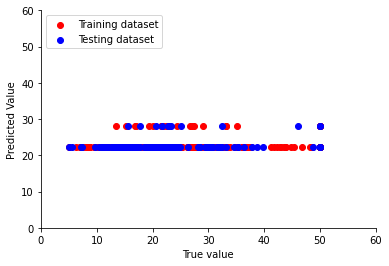

In [9]:
plot_true_predict(bdata_train['MEDV'], train_res, bdata_test['MEDV'], test_res)

---

## Part 2: Nearest Neighbors


### 2.1 Nearest Neighbors: Distance function
I will try and build a machine learning algorithm to beat the "Average Value" baseline that you computed above.  Soon I will implement the Nearest Neighbor algorithm, but first I need to create a distance metric to measure the distance (and similarity) between two instances.  Then I will write a generic function to compute the L-Norm distance (called the [*p*-norm][1] distance on Wikipedia). Verifying that my function works by computing the Euclidean distance between the points (2,7) and (2,4), and then compute the Manhattan distance between (4,4) and (12,10).

[1]: https://en.wikipedia.org/wiki/Norm_(mathematics)#p-norm

In [10]:
"""
Function
--------
distance

Given two instances and a value for L, return the L-Norm distance between them

Parameters
----------
x1, x2 : array
    Array of numerical values corresponding to predictions for each of the N observations

L: int
    Value of L to use in computing distances

Returns
-------
dist : int
    The L-norm distance between instances

Example
-------
>>> print(distance((2,7),(5,11),2))
3

"""
def distance(x1, x2, L):
    x1 = np.asarray(x1)
    # in case x1 and x2 are both one dimension
    if x1.ndim == 1:
        x1 = np.asarray([x1])
    x2 = np.asarray(x2)
    dist = np.power(np.power(np.abs(x1 - x2), L).sum(axis=1), 1.0/L)
    return dist

print(distance((2,7),(5,11),2))
print(distance((4,4),(12,10),1))

[5.]
[14.]


### 2.2 Basic Nearest Neighbor algorithm

My next task is to implement a basic nearest neighbor algorithm from scratch.  My simple model will use three input features (`CRIM, RM and ZN`) and a single output (`MEDV`).  In other words, I'm modelling the relationship between median home value and crime rates, house size and the proportion of residential land zoned for lots.

I will use my training data (bdata_train) to "fit" my model, although as you know, with Nearest Neighbors there is no real training, I just need to keep my training data in memory then write a function that predicts the median home value using the nearest neighbor algorithm we discussed in class.  Since this is a small dataset, I can simply compare my test instance to every instance in the training set, and return the `MEDV` value of the closest training instance.  Have your function take L as an input, where L is passed to the distance function. Use L=2 for all questions henceforth unless explicitly stated otherwise.

I will make sure to do the following - 
1. Fill in the function specification below
2. Use your algorithm to predict the median home value of every instance in the test set. Report the RMSE ("test RMSE")
3. Use your algorithm to predict the median home value of every instance in the training set and report the training RMSE.
4. Create a scatter plot that shows the true value of each instance on the x-axis and the predicted value of each instance on the y-axis. Color the training instances in red and the test instances in blue. 
5. Report an estimate of the total time taken by your code to predict the nearest neighbors for all the values in the test data set.
6. How does the performance (test RMSE and total runtime) of your nearest neighbors algorithm compare to the baseline in part 1.3?

In [11]:
"""
Function
--------
Nearest Neighbors

Implementation of nearest neighbors algorithm.

Parameters
----------
x_train: array
    Array of numerical feature values for training the model.
y_train: array
    Array of numerical output values for training the model.
x_test: array
    Array of numerical feature values for testing the model.
y_test: array
    Array of numerical output values for testing the model.
L: int
    Order of L-norm function used for calculating distance.

Returns
-------
rmse : int
    Value of the RMSE from data.
"""
import time
def nneighbor(x_train, y_train, x_test, y_test, L):
    start_time = time.time()
    
    #declare arrays
    x_train = np.array(x_train)
    y_train = np.array(y_train)
    x_test = np.array(x_test)
    y_test = np.array(y_test)
    y_hat = []
    
    #iterate over test data
    for i in range(len(x_test)):    
        dist = distance(x_train, x_test[i], L)
        idx = dist.tolist().index(min(dist))
        y_hat.append(y_train[idx])
        
    #compute error
    rmse = compute_rmse(y_hat, y_test)
    print("Time taken: {:.3f} seconds".format(time.time() - start_time))
    return rmse

#your additional code here
nn_rmse = nneighbor(bdata_train.loc[:,['CRIM', 'RM', 'ZN']], bdata_train['MEDV'], bdata_test.loc[:,['CRIM', 'RM', 'ZN']], bdata_test['MEDV'], 2)
print("Nearest Neighbor test data rmse = {:.2f}".format(nn_rmse))

nn_rmse = nneighbor(bdata_train.loc[:,['CRIM', 'RM', 'ZN']], bdata_train['MEDV'], bdata_train.loc[:,['CRIM', 'RM', 'ZN']], bdata_train['MEDV'], 2)
print("Nearest Neighbor training data rmse = {:.2f}".format(nn_rmse))

Time taken: 0.015 seconds
Nearest Neighbor test data rmse = 7.12
Time taken: 0.042 seconds
Nearest Neighbor training data rmse = 0.00


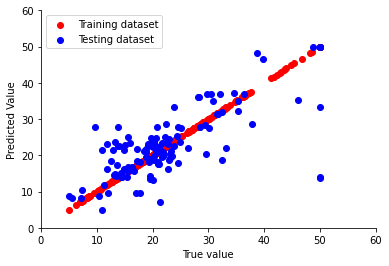

In [12]:
def nneighbor_predict(x_train, y_train, x_test, y_test, L):
    #declare arrays
    x_train = np.array(x_train)
    y_train = np.array(y_train)
    x_test = np.array(x_test)
    y_test = np.array(y_test)
    y_hat = []
    
    #iterate over test data
    for i in range(len(x_test)):    
        dist = distance(x_train, x_test[i], L)
        idx = dist.tolist().index(min(dist))
        y_hat.append(y_train[idx])
        
    return y_hat

y_test_predict = nneighbor_predict(bdata_train.loc[:,['CRIM', 'RM', 'ZN']], bdata_train['MEDV'], bdata_test.loc[:,['CRIM', 'RM', 'ZN']], bdata_test['MEDV'], 2)
y_train_predict = nneighbor_predict(bdata_train.loc[:,['CRIM', 'RM', 'ZN']], bdata_train['MEDV'], bdata_train.loc[:,['CRIM', 'RM', 'ZN']], bdata_train['MEDV'], 2)

plot_true_predict(bdata_train['MEDV'], y_train_predict, bdata_test['MEDV'], y_test_predict)

- 2.The RMSE of the testing dataset is 7.12.
- 3.The RMSE of the training dataset is 0.
- 5.The total time taken to predict the nearest neighbors for all the values in the test data set is 0.02s.
- 6.The test RMSE of the basic nearest neighbor algorithm is noticeably lower than the RMSE of the baseline from part 1.3. The training data falls to zero since each data point is its own "nearest neighbor" -- a sign that we are very likely overfitting.

### 2.3 Results and Normalization

If you were being astute, you would have noticed that we never normalized our features -- a big no-no with Nearest Neighbor algorithms.  Write a generic normalization function that takes as input an array of values for a given feature, and returns the standardized array (subtract the mean and divide by the standard deviation).

I will re-run the Nearest Neighbor algorithm on the normalized dataset (still just using `CRIM, RM and ZN` as input), and compare the RMSE from this method with my previous RMSE evaluations. What do you observe?

*NOTE*: To normalize properly, I should compute the mean and standard deviation on the training set, and use the same values to normalize both the training and the testing dataset.

*NOTE 2*: In this case, the normalization may or may not reduce the RMSE; don't get confused if you find that to be the case.

In [13]:
"""
Function
--------
Normalize data

Normalize all of the features in a data frame.

Parameters
----------
raw_data: array
    Array of numerical values to normalize.

Returns
-------
normalized_data : array
    The array with normalized values for all features
"""
def normalize(raw_data):
    # initialize array
    raw = np.array(raw_data)
    
    # calculate mean, std
    mean = raw.mean(axis=0)
    std = raw.std(axis=0)
    normalized_data = (raw - mean) * 1.0 / std
    
    return mean, std, pd.DataFrame(normalized_data, columns=['CRIM' ,'ZN' ,'INDUS', 'CHAS' ,'NOX', 'RM', 'AGE' ,'DIS' ,'RAD', 'TAX', 'PTRATIO', 'B' ,'LSTAT'])


# your additional code here
# normalize train set
print("********Training and Test set Normalized*******")
train_mean,train_std,nor_bdata_train = normalize(bdata_train.iloc[:,:-1])
nor_bdata_train['MEDV'] = bdata_train['MEDV']

# Use train mean and std to normalize test
raw = np.array(bdata_test.iloc[:,:-1])
normalized_data = (raw - train_mean) * 1.0 / train_std
nor_bdata_test = pd.DataFrame(normalized_data, columns=['CRIM' ,'ZN' ,'INDUS', 'CHAS' ,'NOX', 'RM', 'AGE' ,'DIS' ,'RAD', 'TAX', 'PTRATIO', 'B' ,'LSTAT'])
nor_bdata_test['MEDV'] = bdata_test['MEDV']


# run NN model with normalized data
nor_nn_rmse = nneighbor(nor_bdata_train.loc[:,['CRIM', 'RM', 'ZN']], nor_bdata_train['MEDV'], nor_bdata_test.loc[:,['CRIM', 'RM', 'ZN']], nor_bdata_test['MEDV'], 2)
print("Normalized Nearest Neighbor test data rmse = {:.2f}".format(nor_nn_rmse))

********Training and Test set Normalized*******
Time taken: 0.015 seconds
Normalized Nearest Neighbor test data rmse = 7.46


Standardizing our features led to an increase in our test RMSE. In general, though, without normalization the features that are measured on larger scales contribute more to the error. Normalization is "standard practice", unless you have a strong reason to believe that certain features should count more in your distance function.

### 2.4 Optimization

A lot of the decisions I've made so far have been arbitrary. I will try to increase the performance of my nearest neighbor algorithm by adding features that I think might be relevant, and by using different values of L in the distance function.  Trying a model that uses a different set of 2 features, then try at least one model that uses more than 4 features, then try using a different value of L.  If you're having fun, try a few different combinations of features and L! I will use the test set to report the RMSE values.

What combination of features and distance function provide the lowest RMSE on the test set?  Do your decisions affect the running time of the algorithm?

*NOTE:* For this and all subsequent questions, I should use normalized features. 

In [14]:
# enter your code here

'''
6 - AGE      proportion of owner-occupied units built prior to 1940
11 - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
9 - TAX      full-value property-tax rate per $10,000
3 - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5 - NOX      nitric oxides concentration (parts per 10 million)
'''

#NN with AGE and TAX
nn1 = nneighbor(nor_bdata_train.loc[:,['AGE','TAX']], nor_bdata_train['MEDV'], nor_bdata_test.loc[:,['AGE','TAX']], nor_bdata_test['MEDV'], 2)
print("NN, AGE-TEX, L=2: {:.2f}".format(nn1))

nn2 = nneighbor(nor_bdata_train.loc[:,['AGE','TAX']], nor_bdata_train['MEDV'], nor_bdata_test.loc[:,['AGE','TAX']], nor_bdata_test['MEDV'], 12)
print("NN, AGE-TEX, L=12: {:.2f}".format(nn2))

#NN with CHAS-NOX-AGE-TAX-B
nn3 = nneighbor(nor_bdata_train.loc[:,['AGE','TAX','CHAS','NOX','B']], nor_bdata_train['MEDV'], nor_bdata_test.loc[:,['AGE','TAX','CHAS','NOX','B']], nor_bdata_test['MEDV'], 1)
print("NN, CHAS-NOX-AGE-TEX-B, L=1: {:.2f}".format(nn3))

nn4 = nneighbor(nor_bdata_train.loc[:,['AGE','TAX','CHAS','NOX','B']], nor_bdata_train['MEDV'], nor_bdata_test.loc[:,['AGE','TAX','CHAS','NOX','B']], nor_bdata_test['MEDV'], 2)
print("NN, CHAS-NOX-AGE-TEX-B, L=2: {:.2f}".format(nn4))

nn5 = nneighbor(nor_bdata_train.loc[:,['AGE','TAX','CHAS','NOX','B']], nor_bdata_train['MEDV'], nor_bdata_test.loc[:,['AGE','TAX','CHAS','NOX','B']], nor_bdata_test['MEDV'], 3)
print("NN, CHAS-NOX-AGE-TEX-B, L=3: {:.2f}".format(nn5))


#NN with all features
for l in range(1, 21):
    nn6 = nneighbor(nor_bdata_train.iloc[:,:-1], nor_bdata_train['MEDV'], nor_bdata_test.iloc[:,:-1],  nor_bdata_test['MEDV'], l)
    print("NN, all features, L={}: {:.2f}".format(l, nn6))

Time taken: 0.014 seconds
NN, AGE-TEX, L=2: 9.92
Time taken: 0.013 seconds
NN, AGE-TEX, L=12: 9.93
Time taken: 0.016 seconds
NN, CHAS-NOX-AGE-TEX-B, L=1: 10.27
Time taken: 0.016 seconds
NN, CHAS-NOX-AGE-TEX-B, L=2: 10.23
Time taken: 0.016 seconds
NN, CHAS-NOX-AGE-TEX-B, L=3: 10.24
Time taken: 0.028 seconds
NN, all features, L=1: 5.87
Time taken: 0.028 seconds
NN, all features, L=2: 5.32
Time taken: 0.028 seconds
NN, all features, L=3: 5.16
Time taken: 0.028 seconds
NN, all features, L=4: 5.28
Time taken: 0.028 seconds
NN, all features, L=5: 5.21
Time taken: 0.028 seconds
NN, all features, L=6: 5.26
Time taken: 0.028 seconds
NN, all features, L=7: 5.42
Time taken: 0.028 seconds
NN, all features, L=8: 5.46
Time taken: 0.028 seconds
NN, all features, L=9: 5.44
Time taken: 0.028 seconds
NN, all features, L=10: 5.44
Time taken: 0.028 seconds
NN, all features, L=11: 5.42
Time taken: 0.028 seconds
NN, all features, L=12: 5.56
Time taken: 0.028 seconds
NN, all features, L=13: 5.64
Time taken: 

* Including more features generally leads to a lower RMSE.
* Adding more variables does not increase the running time a lot because the algorithm is very efficient. Using all features did take 0.01 seconds longer than using two or five variables.

### 2.5 Cross-Validation

The more I tinkered with my features and distance function, the higher the risk that I overfit my training data. One solution to this sort of overfitting is to use cross-validation (see K-fold cross-validation). In this task, I have to implement a simple k-fold cross-validation algorithm myself. The function I write here will be used several more times in this problem set, so I need to do my best to write efficient code! (Note that I should not use the sklearn package's built-in K-fold iterator or any related algorithms in this section of the problem set.)

I need to use 25-fold cross-validation and report the average RMSE for Nearest Neighbors using Euclidean distance with CRIM, RM, and ZN input features, as well as the total running time for the full run of 25 folds. In other words, I have to randomly divide my training dataset (created in 1.2) into 25 equally-sized samples.

For each of the 25 iterations (the "folds"), I'll use 24 samples as "training data" (even though there is no training in k-NN!), and the remaining 1 sample for validation. I'll compute the RMSE of that particular validation set, then move on to the next iteration.  

 - Report the average cross-validated RMSE across the 25 iterations. What do you observe?
 
 - Also creating a histogram of the RMSEs for the folds (there should be 25 of these). Additionally, I will use a horizontal line to mark the average cross-validated RMSE.


[1]: http://en.wikipedia.org/wiki/Cross-validation_(statistics)
[2]: http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation



NOTE: To perform any randomized operation, I will only use functions in the *numpy library (np.random)*. And not use other packages for random functions.

HINT: Running 25-fold cross validation might be time-consuming. I will try starting with 5 folds.

In [15]:


# enter your code here
def k_fold(ds, k):
    r = []
    size_all = len(ds)
    size = int(size_all / k)
    ds_index = list(range(size_all))
    # note: the size of the samples may not be divisible by fold.
    # will put all the rest to the last fold
    for i in range(k-1):
        rows = np.random.choice(ds_index, size, replace=False)
        r.append(rows.tolist())
        ds_index = list(set(ds_index) - set(rows))
    r.append(ds_index)
    return r

In [16]:
bdata_x = nor_bdata_train.iloc[:,:-1]
bdata_y = nor_bdata_train['MEDV']
k = 25
rmse_all = []
size_all = len(bdata_x)
ds_fold = k_fold(bdata_x, k)
ds_index = list(range(size_all))
for i in range(k):
    val_idx = ds_fold[i]
    train_idx = list(set(ds_index) - set(val_idx))
    train_x = bdata_x.iloc[train_idx,:][['CRIM', 'RM', 'ZN']]
    train_y = bdata_y.iloc[train_idx]
    val_x = bdata_x.iloc[val_idx,:][['CRIM', 'RM', 'ZN']]
    val_y = bdata_y.iloc[val_idx]
    nn_rmse = nneighbor(train_x, train_y, val_x, val_y, 2)
    print("RMSE: {:.2f}".format(nn_rmse))
    rmse_all.append(nn_rmse)
print("Average RMSE: {:.2f}".format(np.mean(rmse_all)))

Time taken: 0.002 seconds
RMSE: 5.51
Time taken: 0.002 seconds
RMSE: 7.42
Time taken: 0.002 seconds
RMSE: 6.34
Time taken: 0.002 seconds
RMSE: 6.53
Time taken: 0.002 seconds
RMSE: 10.64
Time taken: 0.002 seconds
RMSE: 5.22
Time taken: 0.002 seconds
RMSE: 6.86
Time taken: 0.002 seconds
RMSE: 8.88
Time taken: 0.002 seconds
RMSE: 4.45
Time taken: 0.002 seconds
RMSE: 4.51
Time taken: 0.002 seconds
RMSE: 5.32
Time taken: 0.002 seconds
RMSE: 9.92
Time taken: 0.002 seconds
RMSE: 5.46
Time taken: 0.002 seconds
RMSE: 12.14
Time taken: 0.002 seconds
RMSE: 6.23
Time taken: 0.002 seconds
RMSE: 4.31
Time taken: 0.002 seconds
RMSE: 8.12
Time taken: 0.002 seconds
RMSE: 4.76
Time taken: 0.002 seconds
RMSE: 9.91
Time taken: 0.002 seconds
RMSE: 6.59
Time taken: 0.002 seconds
RMSE: 9.99
Time taken: 0.002 seconds
RMSE: 6.33
Time taken: 0.002 seconds
RMSE: 4.18
Time taken: 0.002 seconds
RMSE: 4.06
Time taken: 0.002 seconds
RMSE: 8.79
Average RMSE: 6.90


In [17]:
np.std(rmse_all)

2.2589659067391428

The average RMSE across the 25 iterations is 6.77. There is considerable variation in the RMSE (standard deviation of RMSE = 2.883), due to the fact that each fold has a different train-validation split, and with 25 splits, some of the validation sets might look quite different from the training data. The RMSE of 6.55 is lower than the test RMSE from 2.3, but the 6.55 RMSE is not the true test RMSE. 

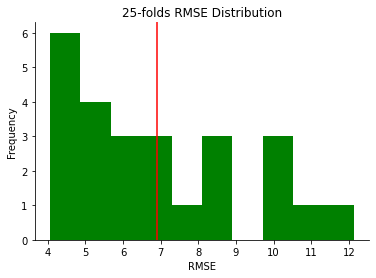

In [18]:
ax = plt.subplot(111);
plt.hist(rmse_all, color='green');
plt.axvline(np.mean(rmse_all),color='red');
plt.ylabel('Frequency')
plt.xlabel('RMSE')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.title('25-folds RMSE Distribution');



### 2.6 K-Nearest Neighbors Algorithm

I need to implement the K-Nearest Neighbors algorithm. I'll use 10-fold cross-validation and L2 normalization, with the same features as in 2.5. I'll report the RMSE for K=5 and the running time of the algorithm. I'll then observe the results and discuss what I find.

In [19]:
"""
Function
--------
K-Nearest Neighbors

Implementation of nearest neighbors algorithm.

Parameters
----------
x_train: array
    Array of numerical feature values for training the model.
y_train: array
    Array of numerical output values for training the model.
x_test: array
    Array of numerical feature values for testing the model.
y_test: array
    Array of numerical output values for testing the model.
L: int
    Order of L-norm function used for calculating distance.
K: int
    Neighbors to include in algorithm
    
Returns
-------
rmse : int
    Value of the RMSE from data.
"""
def knn(x_train, y_train, x_test, y_test, L, k):
    start_time = time.time()
    
    #declare arrays
    x_train = np.array(x_train)
    y_train = np.array(y_train)
    x_test = np.array(x_test)
    y_test = np.array(y_test)
    y_hat = []
    
    #iterate over test data
    for i in range(len(x_test)):    
        dist = distance(x_train, x_test[i], L)
        rank = dist.argsort()
        predict = [y_train[rank[i]] for i in range(k)]
        y_hat.append(np.mean(predict))
    #compute error
    rmse = compute_rmse(y_hat, y_test)
    return rmse

def get_rmse_knn(x, y, L, k_f, k_nn):
    rmse_all = []
    size_all = len(x)
    ds_fold = k_fold(x, k_f)
    ds_index = list(range(size_all))
    for i in range(k_f):
        val_idx = ds_fold[i]
        train_idx = list(set(ds_index) - set(val_idx))
        train_x = x.iloc[train_idx,:]
        train_y = y.iloc[train_idx]
        val_x = x.iloc[val_idx,:]
        val_y = y.iloc[val_idx]

        nn_rmse = knn(train_x, train_y, val_x, val_y, L, k_nn)
        rmse_all.append(nn_rmse)
    rmse = np.mean(rmse_all)
    return rmse

# enter your additional code here
t0 = time.time()
nor_knn_rmse = get_rmse_knn(nor_bdata_train[['CRIM', 'RM', 'ZN']], nor_bdata_train['MEDV'], 2, 10, 5)
print("Time all taken: {:.3f}".format(time.time() - t0))
print("Normalized K-Nearest Neighbor Cross-validated rmse = {:.2f}".format(nor_knn_rmse))

Time all taken: 0.039
Normalized K-Nearest Neighbor Cross-validated rmse = 5.26


* The k-NN cross-validation with 10 folds takes 0.042 seconds.
* The average RMSE across the 10 iterations is 5.41, lower than what we see in 2.5. The k-NN performs better here since we take into account not just the nearest, but 5 nearest neighbors and this helps generalize better.

### 2.7 Using cross validation to find K

I need to compute the cross-validated RMSE for values of K between 1 and 25 using 10-fold cross-validation and L2 normalization. I'll use the following features in my model: CRIM, ZN, RM, AGE, DIS, TAX. I'll create a graph that shows how cross-validated RMSE changes as K increases from 1 to 25. I'll label my axes and summarize what I see. Based on the results, I'll determine a reasonable choice of K for this model.

Finally, I'll report the test RMSE using the value of K that minimized the cross-validated RMSE. I'll continue to use L2 normalization and the same set of features. I'll then compare the test RMSE to the cross-validated RMSE and discuss whether this is what I expected. I'll also compare the test RMSE to the test RMSE from 2.4 and explain if this is in line with my expectations.

In [20]:
r = []
for i in range(1, 26):
    nor_knn_rmse = get_rmse_knn(nor_bdata_train.loc[:,['CRIM','ZN','RM','AGE','DIS','TAX']], nor_bdata_train['MEDV'], 2, 10, i)
    r.append(nor_knn_rmse)

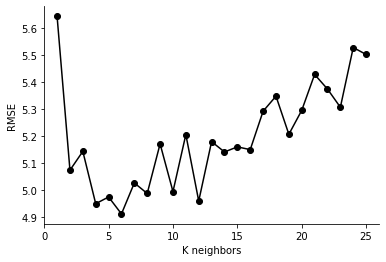

In [21]:
ax = plt.subplot(111)
ax.plot(range(1,26),r,'o-',color='black')
ax.set_xlim([0, 26])
plt.xlabel('K neighbors')
plt.ylabel('RMSE')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

In [22]:
np.argmin(r) + 1 #we had 1 here because the index of the first iteration is 0.

6

In [23]:
np.min(r)

4.913173308206959

The lowest RMSE is observed at K=4. From K=6 it seems to be increasing steadily.

In [24]:
best_k = np.argmin(r)
knn(nor_bdata_train.loc[:,['CRIM','ZN','RM','AGE','DIS','TAX']], nor_bdata_train['MEDV'],nor_bdata_test.loc[:,['CRIM','ZN','RM','AGE','DIS','TAX']], nor_bdata_test['MEDV'], 2, best_k)

5.9130132744863655

The test RMSE for the best value of K is 5.913. It is higher than the cross-validated average at the same value of K. In 2.4, we hit the least test RMSE at 4.9131 with L=9 and including all features ; here we use a subset of the features and L=2, therefore the RMSE is not surprisingly slightly higher that what we noticed earlier. 

### Forward selection

So far, the choice of predictor variables has been rather arbitrary. I'll implement a basic forward selection algorithm to progressively include features that decrease the cross-validated RMSE of the model. I should note that the optimal value of K may be different for each model, so I may want to use cross-validation to choose K each time (but it's also fine if I fix K at the optimal value from 2.7). I'll create a graph that shows RMSE as a function of the number of features in the model. I'll label each point on the x-axis with the name of the feature that is added at that step in the forward selection algorithm. For example, if the optimal single-feature model has CRIM with RMSE = 10, and the optimal two-feature model has CRIM+ZN with RMSE=9, the first x-axis label will say CRIM and the second x-axis label will say ZN.

In [25]:
def get_smallest_rmse(x, y, L, k_f):
    r = []
    # get the smallest rmse using k from 1 to 15
    for i in range(1, 16):
        nor_knn_rmse = get_rmse_knn(x, y, L, k_f, i)
        r.append(nor_knn_rmse)
    return np.min(r)

In [26]:
def get_feature_with_min_rmse(x, y, L, k_f, features_id_selected, features_id_test):
    r_all = []
    for i in features_id_test:
        r = get_smallest_rmse(x.iloc[:,[i] + features_id_selected], y, L, k_f)
        r_all.append(r)
    feature_id_min_rmse = np.argsort(r_all)[0]
    rmse = r_all[feature_id_min_rmse]
    # be careful: features_id_test[feature_id_min_rmse]
    v_name = x.columns[feature_id_min_rmse]
    return features_id_test[feature_id_min_rmse], rmse, v_name

In [27]:
bdata_x = bdata_train.iloc[:,:-1]
bdata_y = bdata_train['MEDV']
features_id = list(range(13))
features_id_selected = []
rmse_min = float("inf")
v_name_all = []
rmse_min_all = []
for i in range(13):
    f_id, rmse, v_name = get_feature_with_min_rmse(bdata_x, bdata_y, 2, 10, features_id_selected, features_id)
    if rmse < rmse_min:
        rmse_min = rmse
        features_id = list(set(features_id) - set([f_id]))
        features_id_selected.append(f_id)
        print("adding {} has the smallest rmse {:.2f}".format(v_name, rmse))
        v_name_all.append(v_name)
        rmse_min_all.append(rmse_min)
#     else:
#         break

adding LSTAT has the smallest rmse 5.11
adding RM has the smallest rmse 4.31
adding CRIM has the smallest rmse 3.97


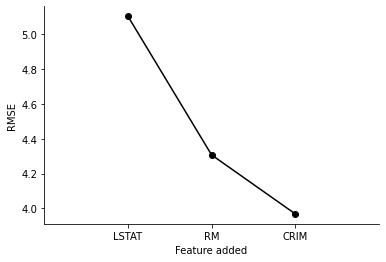

In [28]:
ax = plt.subplot(111)
ax.plot(range(1,len(rmse_min_all)+1),rmse_min_all,'o-',color='black')
ax.set_xlim([0, len(rmse_min_all)+1])
plt.xlabel('Feature added')
plt.ylabel('RMSE')
plt.xticks(range(1,len(rmse_min_all)+1), v_name_all)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')